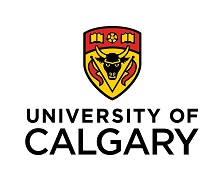

In [79]:
from IPython.display import Image
Image("../Images/Logo.jpg")

# <center>Graduate Project ENEL 698</center>
<center><a href = "https://github.com/isohels/Graduate-Project">Github Link</a></center>

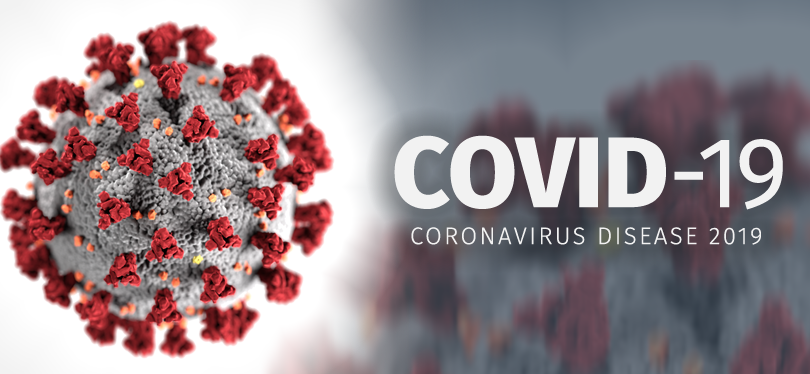

In [81]:
Image("../Images/Covid-19.png")

## This Notebook constitues of analysis of **Effectiveness of School Closures and Reopening** for reducing Coronavirus Disease 2019 (COVID-19) transmission.

## Objective and Scope
### Schools have been closed all across the globe with other layers of individual and community-based public health measures to curb the spread of COVID-19. This analysis aims to assist decision-makers with evidence to support decision-making during pandemic.

 - This analysis will address the following question:
1. This anlaysis will tell us what is the effectiveness of school closures on reducing transmission of COVID-19?
2. What impacts do the reopening of schools have on COVID-19 transmission?

#### Lets load the data to see how the world has been affected by COVID-19.

In [1]:
#importing the necessary files required for visualization and statistical analysis

import requests

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [87]:
# grabbing latest worldwide data

url = "https://ncov2019.live/data/world"

r = requests.get(url)
df_list = pd.read_html(r.text)            #this parse all html tables from a webpage to alist
world_df = df_list[2]
world_df.to_csv("ncov2019_data.csv", sep= '\t')

In [88]:
# We will now sort the countries based on total confirmed cases column

world_df = world_df.sort_values("Confirmed" , ascending = False)



#Lets get top 10 affected countries

world_df.head(10)

,Name,Confirmed,Per Million,Changes Today,Percentage Day Change,Critical,Deceased,Per Million.1,Changes Today.1,Percentage Death Change,Tests,Active,Recovered,Per Million.2,Population
0,TOTAL,31783958,4088,14176,0.04%,62083,975472,125,712,0.07%,611042924,7496357,23181023,2981,7775426513
169,★ United States,7097937,21415,0,0%,14059,205471,620,0,0%,99681973,2546356,4346110,13113,331446917
170,★ India,5646010,4082,5514,0.1%,8944,90021,65,0,0%,66279462,968376,4587613,3317,1383085891
171,★ Brazil,4595335,21584,0,0%,8318,138159,649,0,0%,15011116,511549,3945627,18532,212904426
172,★ Russia,1115810,7645,0,0%,2300,19649,135,0,0%,43300000,178212,917949,6290,145948932
173,★ Colombia,777537,15244,0,0%,863,24570,482,0,0%,3460714,102166,650801,12759,51005866
174,★ Peru,776546,23478,0,0%,1405,31586,955,0,0%,3724872,115866,629094,19020,33075316
175,★ Mexico,705263,5457,4683,0.67%,2672,74348,575,651,0.88%,1604845,124183,506732,3921,129240005
176,★ Spain,682267,14591,0,0%,1417,30904,661,0,0%,11820505,500987,150376,3216,46758966
142,★ South Africa,663282,11152,0,0%,539,16118,271,0,0%,4064117,54260,592904,9969,59477584


#### The country converter (coco) - a Python package for converting country names between different classifications schemes.¶
<a href = "https://pypi.org/project/country-converter/">For more info please click here</a>.

In [4]:
import country_converter as coco

In [5]:
# Creating a list and appending all the names from world_df column.

Names = []
for i in range(1,215):
    Names.append(world_df.iloc[i]['Name'][3:])

# Insert Total at index 0. we left that because it doesn't contain any start in it.

Names.insert(0,'TOTAL')

In [6]:
standard_names = coco.convert(names= Names, to='ISO3')
print(len(standard_names))

215


In [7]:
# Adding the ISO3 code in a new world_df['Code'] column.

world_df['Code'] = standard_names

# Removing countries of which ISO3 code is not available

world_df = world_df[world_df['Code'] != 'not found']

#### Plot total number of confirmed cases (Top 20)

[Text(0, 0.5, 'Confirmed Cases'), Text(0.5, 0, 'Countries')]

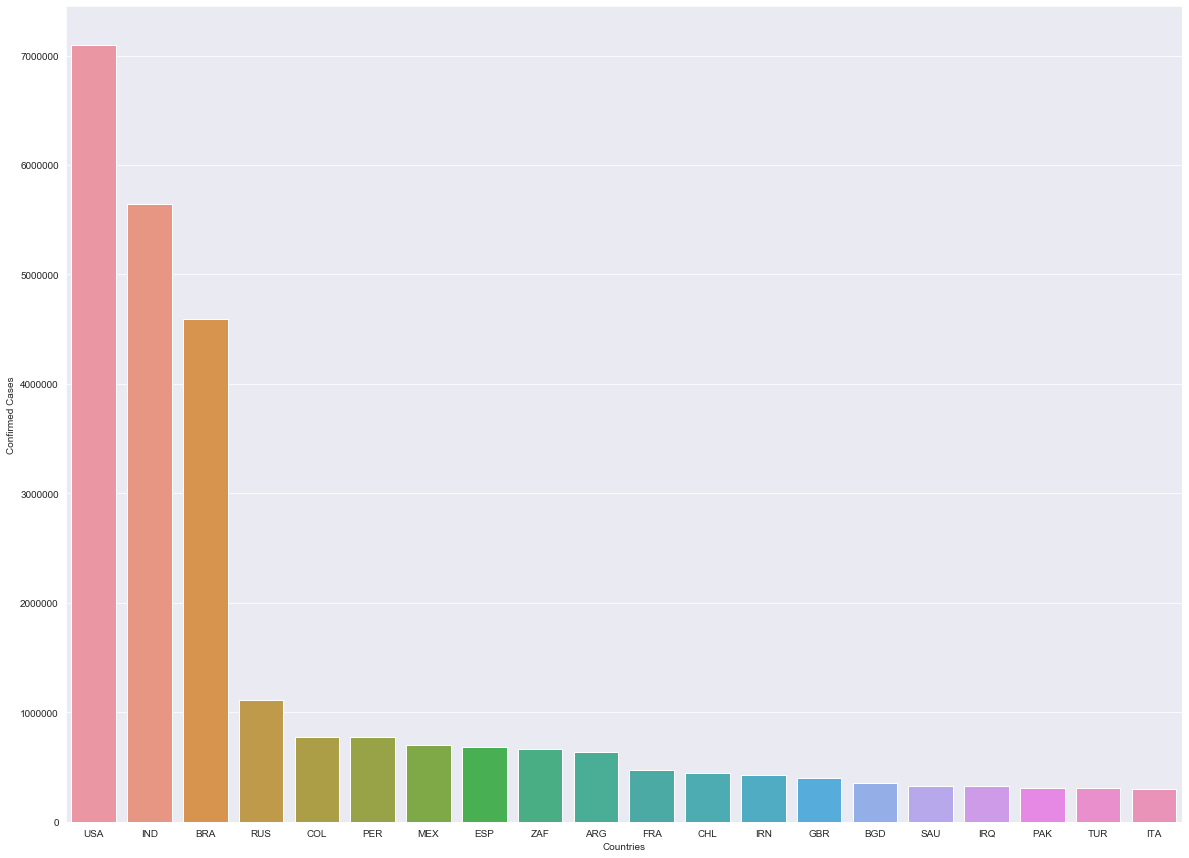

In [8]:
# Lets plot top 20 countries based on confirmed cases

plt.figure(figsize=(20,15))
sns.set_style("darkgrid")
ax = sns.barplot(x = "Code" , y = 'Confirmed', data = world_df.head(20))
ax.set(xlabel="Countries", ylabel = "Confirmed Cases")

 - USA, INDIA, and BRAZIL have been affected very severely.
 - The major reason being the failure of implementation of COVID-19 preventive measures by both Government and Citizens.

## Global Closure of School

#### The following data has been provided by **Namara** in association with **Alberta Innovates**.
- Data Source - <a href = "https://app.dataxch.ai/#/organizations/">For more info please click here</a>.

## Description
#### The number of children, youth and adults not attending schools or universities because of COVID-19 is soaring. Governments all around the world have closed educational institutions in an attempt to contain the global pandemic.
#### According to UNESCO monitoring, over 100 countries have implemented nationwide closures, impacting over half of worlds student population. Several other countries have implemented localized school closures and, should these closures become nationwide, millions of additional learners will experience education disruption.

In [9]:
# load the data from the local directory

school_closure_df = pd.read_csv("../covid_data/Data/GlobalSchoolClosuresCOVID-19/global-school-closures-covid-19.csv.csv")

In [10]:
school_closure_df.head()

,date,iso,country,status,note
0,2020-02-17 00:00:00+00,CHN,China,Partially open,NaN
1,2020-02-17 00:00:00+00,MNG,Mongolia,Closed due to COVID-19,NaN
2,2020-02-18 00:00:00+00,CHN,China,Partially open,NaN
3,2020-02-18 00:00:00+00,MNG,Mongolia,Closed due to COVID-19,NaN
4,2020-02-19 00:00:00+00,CHN,China,Partially open,NaN


#### Lets explore this dataset

In [11]:
school_closure_df.nunique()

date       227
iso        210
country    210
status       4
note         0
dtype: int64

In [12]:
# Number of Countries

print("This dataset contains {} number of countries.".format(school_closure_df['iso'].nunique()))

This dataset contains 210 number of countries.


#### Lets see what are the categorical variables (policies) for each country.

In [13]:
from termcolor import colored

In [14]:
# Number of Categories

print("There are {} categories in which school across the globe are divided provided this dataset.". format(school_closure_df['status'].nunique()))
print("The Categories are mentioned below:")
print(colored(school_closure_df['status'].unique(), 'green'))

There are 4 categories in which school across the globe are divided provided this dataset.
The Categories are mentioned below:
['Partially open' 'Closed due to COVID-19' 'Academic break' 'Fully open']


#### I'm creating a multindex here. It will allow us to group data based on iso codes of the respective countries.

In [15]:
# MultiIndexing to group data

print(colored(school_closure_df.set_index(['iso','country']).sort_index().head(1000),'blue'))

                               date                  status  note
iso country                                                      
ABW Aruba    2020-03-16 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-17 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-18 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-19 00:00:00+00  Closed due to COVID-19   NaN
    Aruba    2020-03-20 00:00:00+00  Closed due to COVID-19   NaN
...                             ...                     ...   ...
ALB Albania  2020-09-18 00:00:00+00              Fully open   NaN
    Albania  2020-09-19 00:00:00+00              Fully open   NaN
    Albania  2020-09-20 00:00:00+00              Fully open   NaN
    Albania  2020-09-21 00:00:00+00              Fully open   NaN
    Albania  2020-09-22 00:00:00+00              Fully open   NaN

[1000 rows x 3 columns]


[Text(0, 0.5, 'Number of Schools Impacted'), Text(0.5, 0, 'Status')]

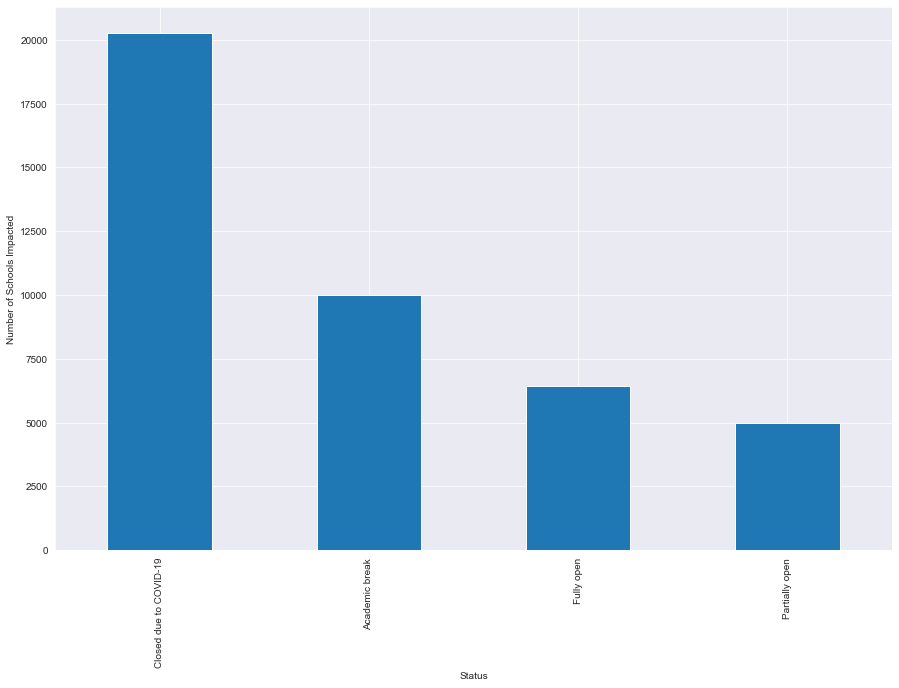

In [16]:
# How Schools are reacting to COVID-19 in various countries. 

plt.figure(figsize = (15,10))
ax = school_closure_df['status'].value_counts().plot(kind='bar')
ax.set(xlabel="Status", ylabel = "Number of Schools Impacted")

 - As situation got worse, school authorities all around the world have implemented various policies.
 - **More than 20,000 schools have opted to close** which was <font color = 'green'>**primary**</font> choice of the officials.
 - Some authorities decided to give students **Academic break**, which was secondary choice.
 - Some countries haven't decided to close the schools yet.

In [17]:
# Filtering Canada specific data.

canada_school_closure_df = school_closure_df[school_closure_df['iso']=='CAN']
print(colored(canada_school_closure_df,'magenta'))

                         date  iso country          status  note
423    2020-03-13 00:00:00+00  CAN  Canada  Partially open   NaN
489    2020-03-14 00:00:00+00  CAN  Canada  Partially open   NaN
557    2020-03-15 00:00:00+00  CAN  Canada  Partially open   NaN
635    2020-03-16 00:00:00+00  CAN  Canada  Partially open   NaN
761    2020-03-17 00:00:00+00  CAN  Canada  Partially open   NaN
...                       ...  ...     ...             ...   ...
40696  2020-09-26 00:00:00+00  CAN  Canada  Partially open   NaN
40906  2020-09-27 00:00:00+00  CAN  Canada  Partially open   NaN
41116  2020-09-28 00:00:00+00  CAN  Canada  Partially open   NaN
41326  2020-09-29 00:00:00+00  CAN  Canada  Partially open   NaN
41536  2020-09-30 00:00:00+00  CAN  Canada  Partially open   NaN

[202 rows x 5 columns]


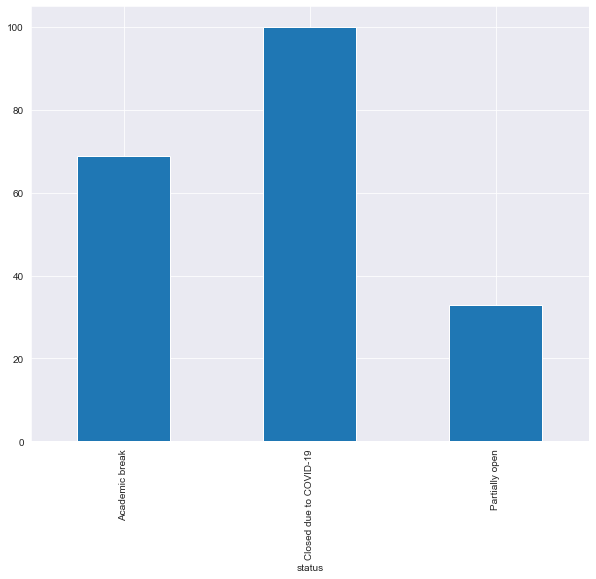

In [18]:
# How Canadian schools reacted?

plt.figure(figsize=(10,8))
canada_school_closure_df.groupby('status')['status'].count().plot(kind='bar')

 - As COVID-19 outbreak became a serious issue, Majority of the **schools were closed** in **Canada**. Only a few were **Partially open**.

#### Lets see when the schools were closed all over Canada.

In [19]:
# When Canada Decided to close the school?

canada_school_closure_df[canada_school_closure_df['status']=='Closed due to COVID-19'].head(10).style.apply(lambda x: ['background: yellow'
                                                                                          if (x.name == 1680) 
                                                                                          else '' for i in x], axis=1)

,date,iso,country,status,note
1680,2020-03-23 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
1862,2020-03-24 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2048,2020-03-25 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2236,2020-03-26 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2426,2020-03-27 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2618,2020-03-28 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
2810,2020-03-29 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3005,2020-03-30 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3203,2020-03-31 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan
3402,2020-04-01 00:00:00+00,CAN,Canada,Closed due to COVID-19,nan


1. From this we can see that schools in Canada were closed in the month of March. We will use this finding to see how effective this policy was. Based on number of reported cases before and after March.
2. Any significant drop in the number of confirmed cases by implementing this policy will be helpful to prepare for future pandemics.

In [20]:
# Partially open status of the schools in Canada.

canada_school_closure_df[canada_school_closure_df['status']=='Partially open']

,date,iso,country,status,note
423,2020-03-13 00:00:00+00,CAN,Canada,Partially open,NaN
489,2020-03-14 00:00:00+00,CAN,Canada,Partially open,NaN
557,2020-03-15 00:00:00+00,CAN,Canada,Partially open,NaN
635,2020-03-16 00:00:00+00,CAN,Canada,Partially open,NaN
761,2020-03-17 00:00:00+00,CAN,Canada,Partially open,NaN
891,2020-03-18 00:00:00+00,CAN,Canada,Partially open,NaN
1031,2020-03-19 00:00:00+00,CAN,Canada,Partially open,NaN
1184,2020-03-20 00:00:00+00,CAN,Canada,Partially open,NaN
1348,2020-03-21 00:00:00+00,CAN,Canada,Partially open,NaN
1513,2020-03-22 00:00:00+00,CAN,Canada,Partially open,NaN


#### So here are some interesting facts that we might have overlooked in the above data

In [21]:
# Partially open status of the schools in Canada.

canada_school_closure_df[canada_school_closure_df['status']=='Partially open'].head(15).style.apply(lambda x: ['background: yellow'
                                                                                          if (x.name == 1513 or x.name == 36916)
                                                                                          else '' for i in x], axis=1)  

,date,iso,country,status,note
423,2020-03-13 00:00:00+00,CAN,Canada,Partially open,nan
489,2020-03-14 00:00:00+00,CAN,Canada,Partially open,nan
557,2020-03-15 00:00:00+00,CAN,Canada,Partially open,nan
635,2020-03-16 00:00:00+00,CAN,Canada,Partially open,nan
761,2020-03-17 00:00:00+00,CAN,Canada,Partially open,nan
891,2020-03-18 00:00:00+00,CAN,Canada,Partially open,nan
1031,2020-03-19 00:00:00+00,CAN,Canada,Partially open,nan
1184,2020-03-20 00:00:00+00,CAN,Canada,Partially open,nan
1348,2020-03-21 00:00:00+00,CAN,Canada,Partially open,nan
1513,2020-03-22 00:00:00+00,CAN,Canada,Partially open,nan


1. Here we can see that schools were partially open till March.
2. After that canadian government implemented school and university closure.
3. University of Calgary itself closed all its operation in the month of the March.
4. This helped Canadian government contain the spread of COVID-19.
5. The government with many public health measures decided to reopen school in September. This includes mandatory masaking, physical distancing, enhanced cleaning, daily symptom screening. If a case is confirmed, contact tracers and public health officals will be deployed  to identify potential exposure and limit spread.

#### Lets see answer to the two questions based on the data discovered above.
1. Effectiveness of school closures on reducing transmission of COVID-19?
- Data Source - Open Timeline Canada data

In [22]:
# Load data

canada_covid_df = pd.read_csv('../covid_data/Data/Covid-19/covid19.csv')
canada_covid_df.head(10)

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,0.0,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN
5,1,Canada,Canada,08-02-2020,7,0,0.0,7,NaN,NaN,...,0.0,NaN,NaN,100.0,7.0,0.02,NaN,NaN,NaN,NaN
6,35,Ontario,Ontario,16-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
7,59,British Columbia,Colombie-Britannique,16-02-2020,5,0,0.0,5,NaN,NaN,...,0.0,NaN,NaN,100.0,5.0,0.10,NaN,NaN,NaN,NaN
8,1,Canada,Canada,16-02-2020,8,0,0.0,8,NaN,NaN,...,0.0,NaN,NaN,100.0,8.0,0.02,NaN,NaN,NaN,NaN
9,35,Ontario,Ontario,21-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN


In [23]:
#converting the date column to datetime format and extracting month from it.

from datetime import datetime

canada_covid_df['date'] = pd.to_datetime(canada_covid_df['date'], infer_datetime_format=True)
canada_covid_df['Month'] = canada_covid_df['date'].dt.strftime('%b')
canada_covid_df['Month Number'] = canada_covid_df['date'].dt.month

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

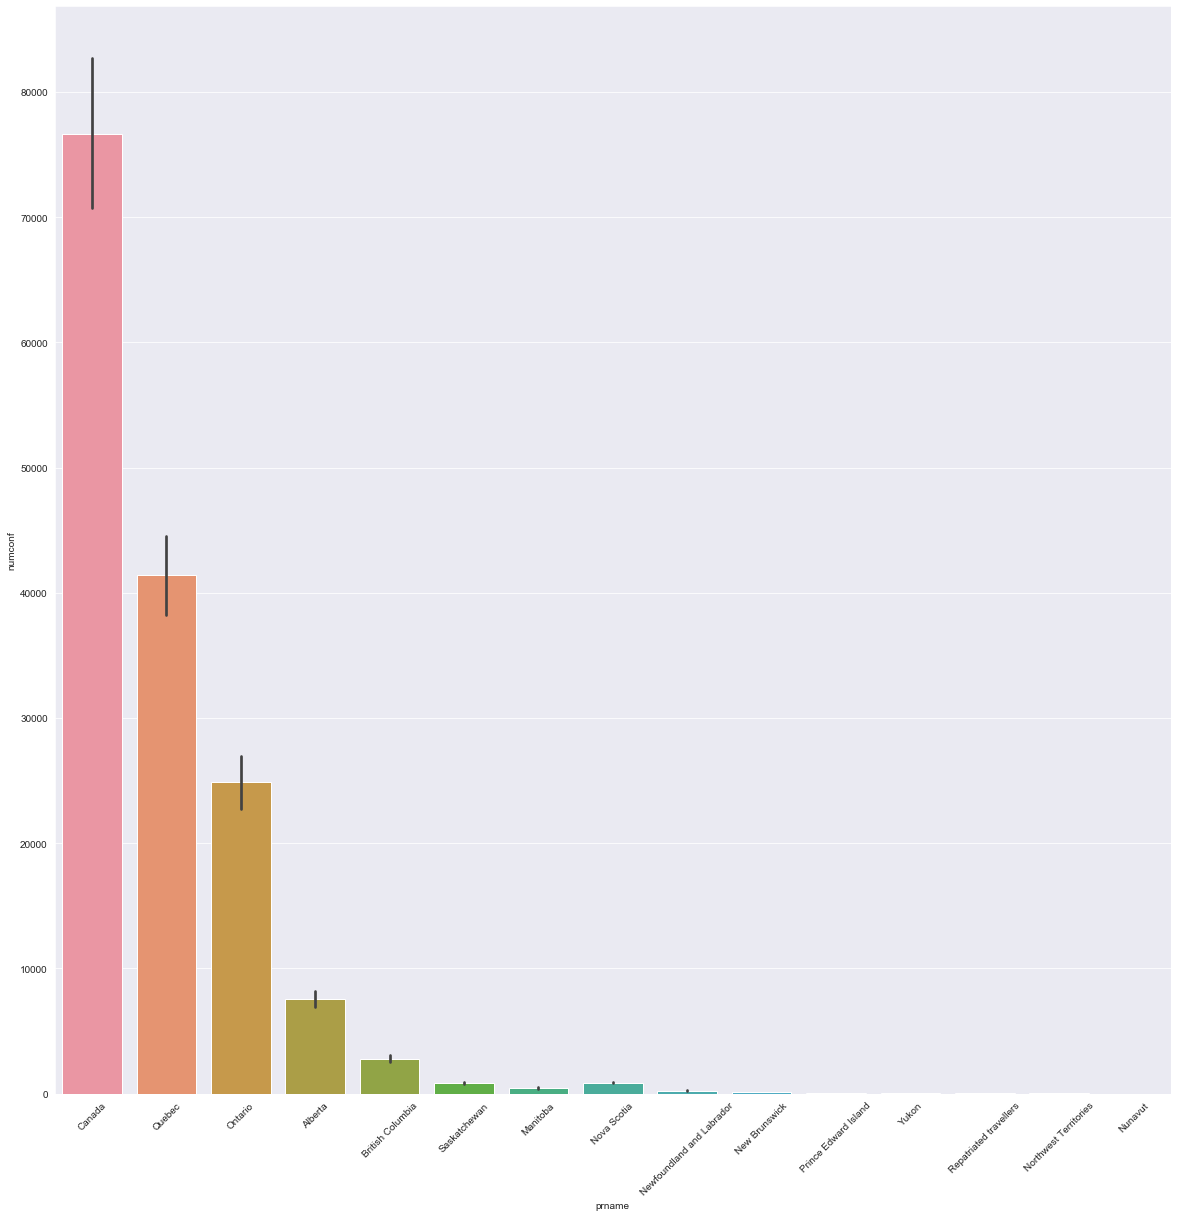

In [24]:
# lets see which province has been worst affected by covid-19

plt.figure(figsize=(20,20))
sns.barplot(x='prname',y='numconf', data=canada_covid_df.sort_values('numconf',ascending=False))
plt.xticks(rotation = 45)

 - As we can see Ontario, Quebec and Alberta have been affected more in comparison to other province.

In [25]:
canada_covid_df = canada_covid_df[canada_covid_df['pruid'] != 1]

In [26]:
#grouping the data based on month to get total num of active cases, num of confirmed cases by month.

grouped = canada_covid_df.groupby('Month Number').sum()
grouped

,pruid,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
Month Number,,,,,,,,,,,,,,,,,,,,,
1,94,4,0,0.0,4,0.0,0.0,0.00,0.0,4,...,0.00,0.0,0.0,200.00,4.0,0.04,0.0,0.00,0.0,0.00
2,752,85,0,0.0,85,0.0,0.0,0.00,0.0,11,...,0.00,0.0,0.0,1600.00,85.0,1.22,0.0,0.00,0.0,0.00
3,13249,50358,1655,580.0,52013,2132606.0,3833.0,686.82,878175.0,8515,...,120.30,241214.0,1254.0,24992.87,47600.0,1193.98,40827.0,969.68,435.0,6.57
4,17610,915192,412,39490.0,915602,15041059.0,226779.0,12628.40,5979141.0,44687,...,586.76,565311.0,24357.0,23684.76,649060.0,11120.81,547037.0,8812.83,30518.0,366.01
5,18197,2327883,341,170408.0,2328224,38768195.0,1146246.0,32015.86,11955583.0,37712,...,1035.85,859306.0,27481.0,5448.06,1011336.0,12685.37,591303.0,7324.75,60065.0,690.36
6,17610,2969578,330,243829.0,2966043,66304217.0,1795740.0,34967.92,17910666.0,13257,...,1129.18,1104322.0,18702.0,2903.29,926479.0,10913.93,240345.0,2667.96,27183.0,302.14
7,18197,3402199,367,272939.0,3402566,105364050.0,2608538.0,36379.41,26155620.0,12108,...,1139.65,1280205.0,33633.0,2780.92,521089.0,6842.93,157131.0,2582.58,6095.0,72.74
8,18197,3794801,177,279940.0,3794978,148398825.0,3350930.0,36493.76,36044183.0,12636,...,1038.86,1454034.0,12991.0,2767.61,164108.0,3314.17,175285.0,3692.10,2777.0,53.04
9,11153,2570001,16,174134.0,2570001,114242526.0,2261517.0,22620.69,27693228.0,13826,...,586.63,1049755.0,9969.0,1492.66,134350.0,2524.67,156405.0,2848.64,1249.0,22.25


In [27]:
#After grouping the grouping variable becomes the index so making it a label again for visualization

grouped['Month Number'] = grouped.index
grouped

,pruid,numconf,numprob,numdeaths,numtotal,numtested,numrecover,percentrecover,ratetested,numtoday,...,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,Month Number
Month Number,,,,,,,,,,,,,,,,,,,,,
1,94,4,0,0.0,4,0.0,0.0,0.00,0.0,4,...,0.0,0.0,200.00,4.0,0.04,0.0,0.00,0.0,0.00,1
2,752,85,0,0.0,85,0.0,0.0,0.00,0.0,11,...,0.0,0.0,1600.00,85.0,1.22,0.0,0.00,0.0,0.00,2
3,13249,50358,1655,580.0,52013,2132606.0,3833.0,686.82,878175.0,8515,...,241214.0,1254.0,24992.87,47600.0,1193.98,40827.0,969.68,435.0,6.57,3
4,17610,915192,412,39490.0,915602,15041059.0,226779.0,12628.40,5979141.0,44687,...,565311.0,24357.0,23684.76,649060.0,11120.81,547037.0,8812.83,30518.0,366.01,4
5,18197,2327883,341,170408.0,2328224,38768195.0,1146246.0,32015.86,11955583.0,37712,...,859306.0,27481.0,5448.06,1011336.0,12685.37,591303.0,7324.75,60065.0,690.36,5
6,17610,2969578,330,243829.0,2966043,66304217.0,1795740.0,34967.92,17910666.0,13257,...,1104322.0,18702.0,2903.29,926479.0,10913.93,240345.0,2667.96,27183.0,302.14,6
7,18197,3402199,367,272939.0,3402566,105364050.0,2608538.0,36379.41,26155620.0,12108,...,1280205.0,33633.0,2780.92,521089.0,6842.93,157131.0,2582.58,6095.0,72.74,7
8,18197,3794801,177,279940.0,3794978,148398825.0,3350930.0,36493.76,36044183.0,12636,...,1454034.0,12991.0,2767.61,164108.0,3314.17,175285.0,3692.10,2777.0,53.04,8
9,11153,2570001,16,174134.0,2570001,114242526.0,2261517.0,22620.69,27693228.0,13826,...,1049755.0,9969.0,1492.66,134350.0,2524.67,156405.0,2848.64,1249.0,22.25,9


Text(0, 0.5, 'Number of Active Cases')

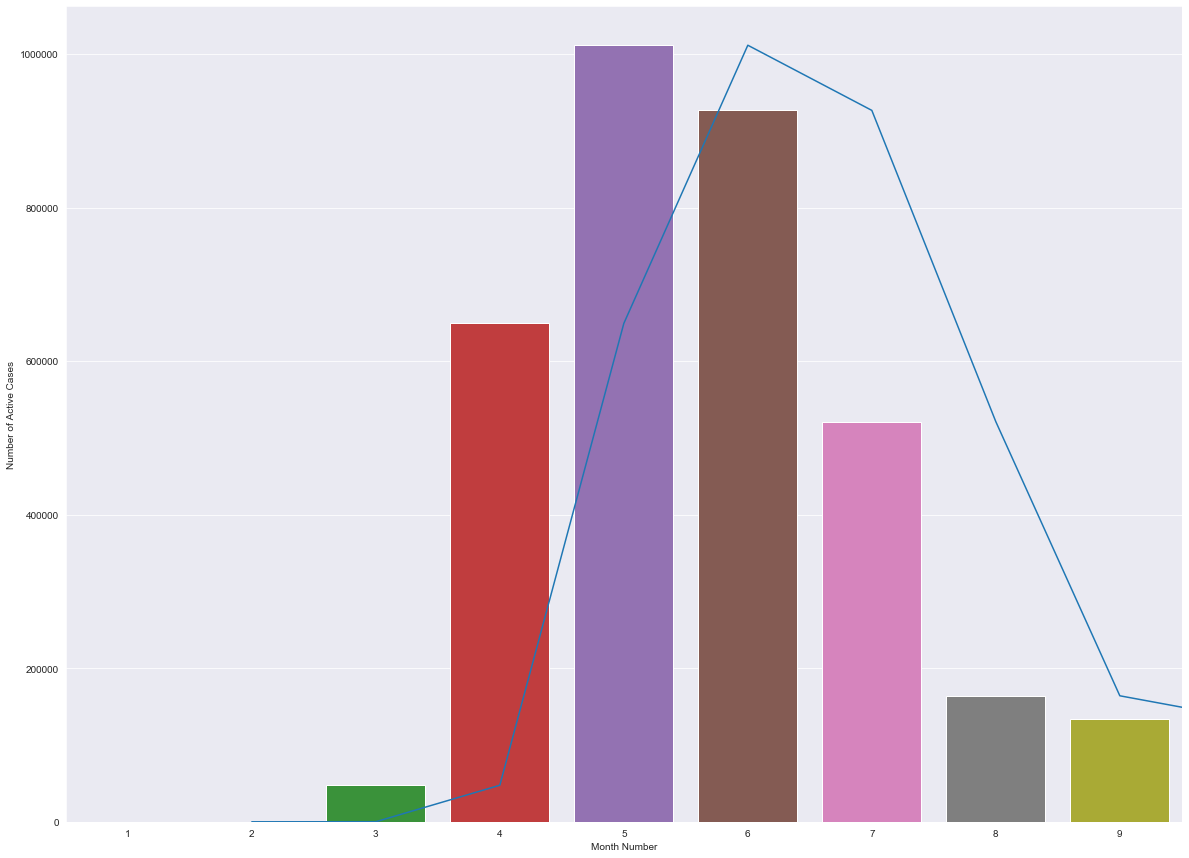

In [28]:
#plotting the grouped data for visualization.

plt.figure(figsize = (20,15))
sns.lineplot(x = 'Month Number' , y = 'numactive', data = grouped)
sns.barplot(x = 'Month Number' , y = 'numactive', data = grouped)
plt.ylabel("Number of Active Cases")

 - Here we can see maximum number of active cases were reported in the month <font color = 'red'>**May**</font>.
 - After that we can see a decline in number of active cases. Which indicates the <font color = 'green'>**effectiveness of school closing** </font>along with other social distancing measures.
 - There is a percentage drop of <font color ='green'>**~86%**</font> in number of active cases from the Month of May to September.

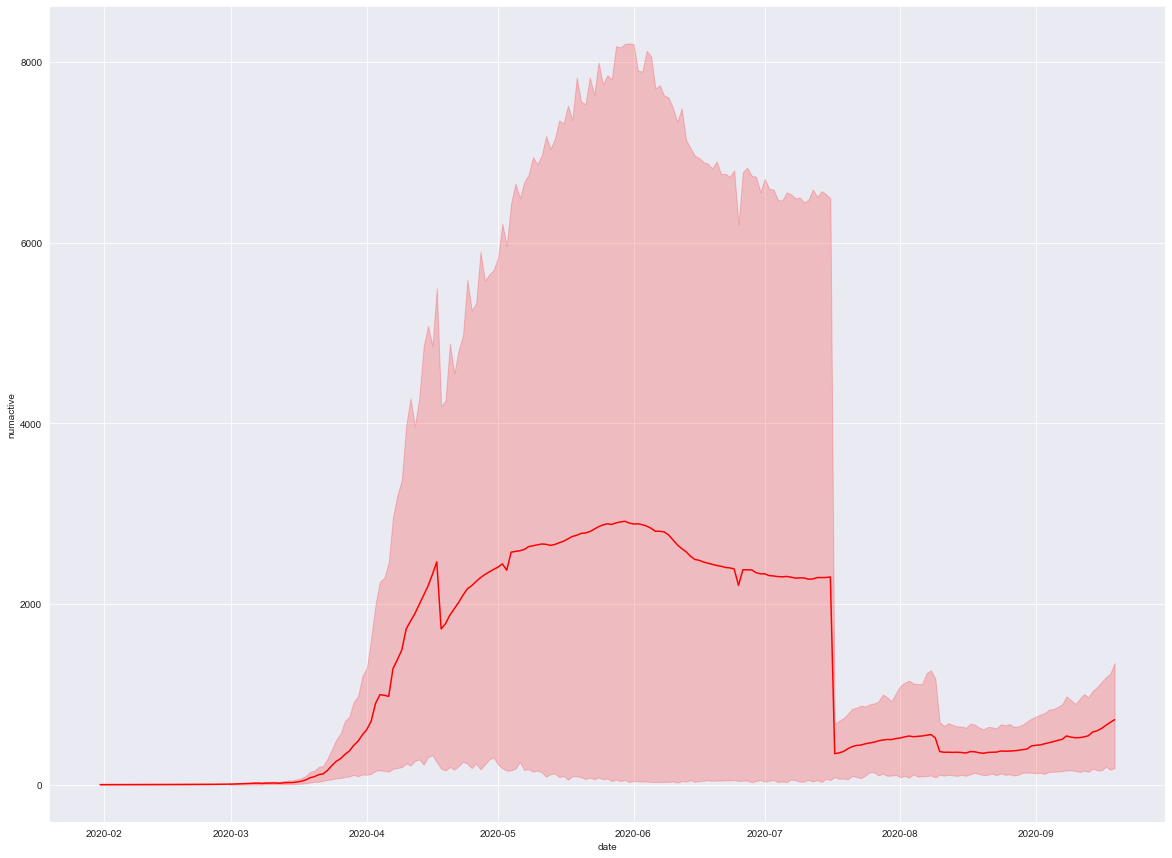

In [29]:
# New Cases by Date

plt.figure(figsize=(20,15))
sns.lineplot(y = 'numactive', x = 'date', data = canada_covid_df, color = 'red')

 - This graph shows timeline variation of **num of active cases** in canada.

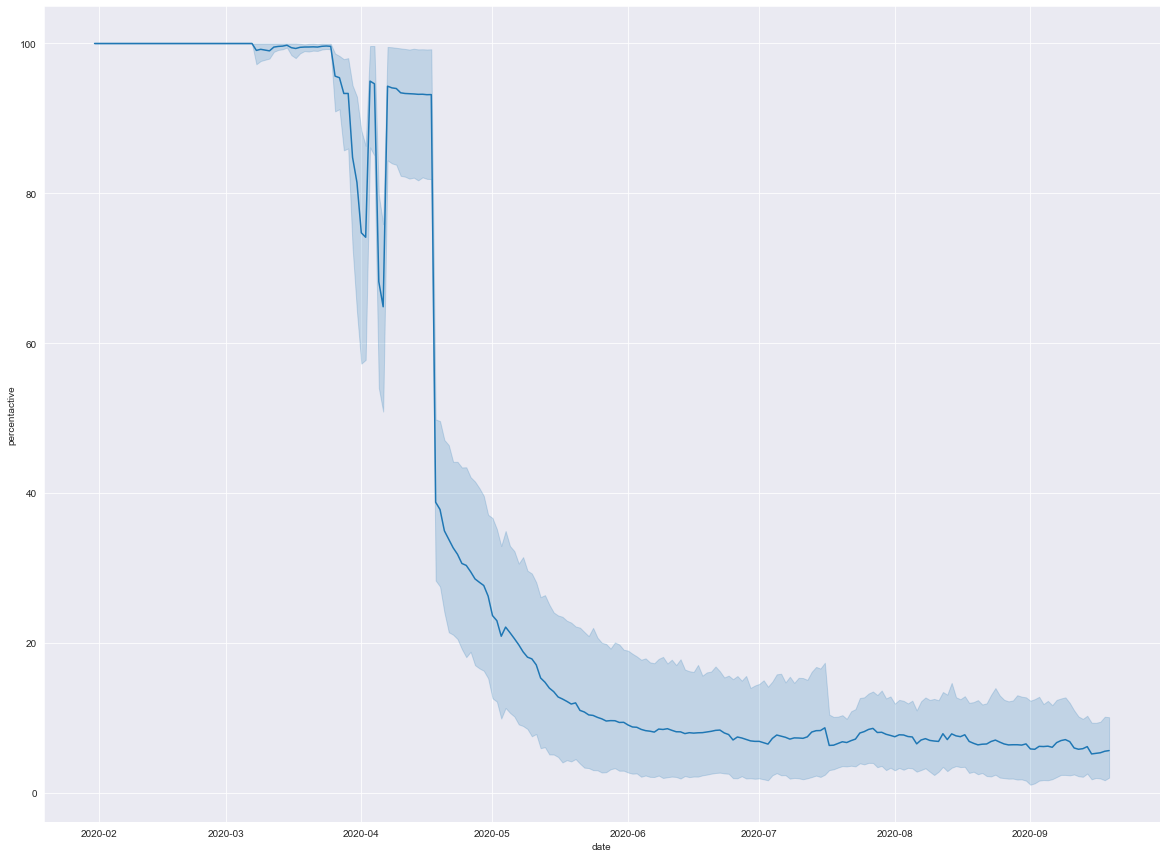

In [30]:
# Rate of new cases by previous date

plt.figure(figsize=(20,15))
sns.lineplot(y = 'percentactive', x = 'date', data = canada_covid_df)

 - **% of active cases** dropped significantly after **april**. This can be attributed to nationwide **Shutdown**.
 - This graph also shows how **Shutdown** in Global pandemics can help nations contain the spread of the virus.

#### Total Confirmed cases (log-scale)

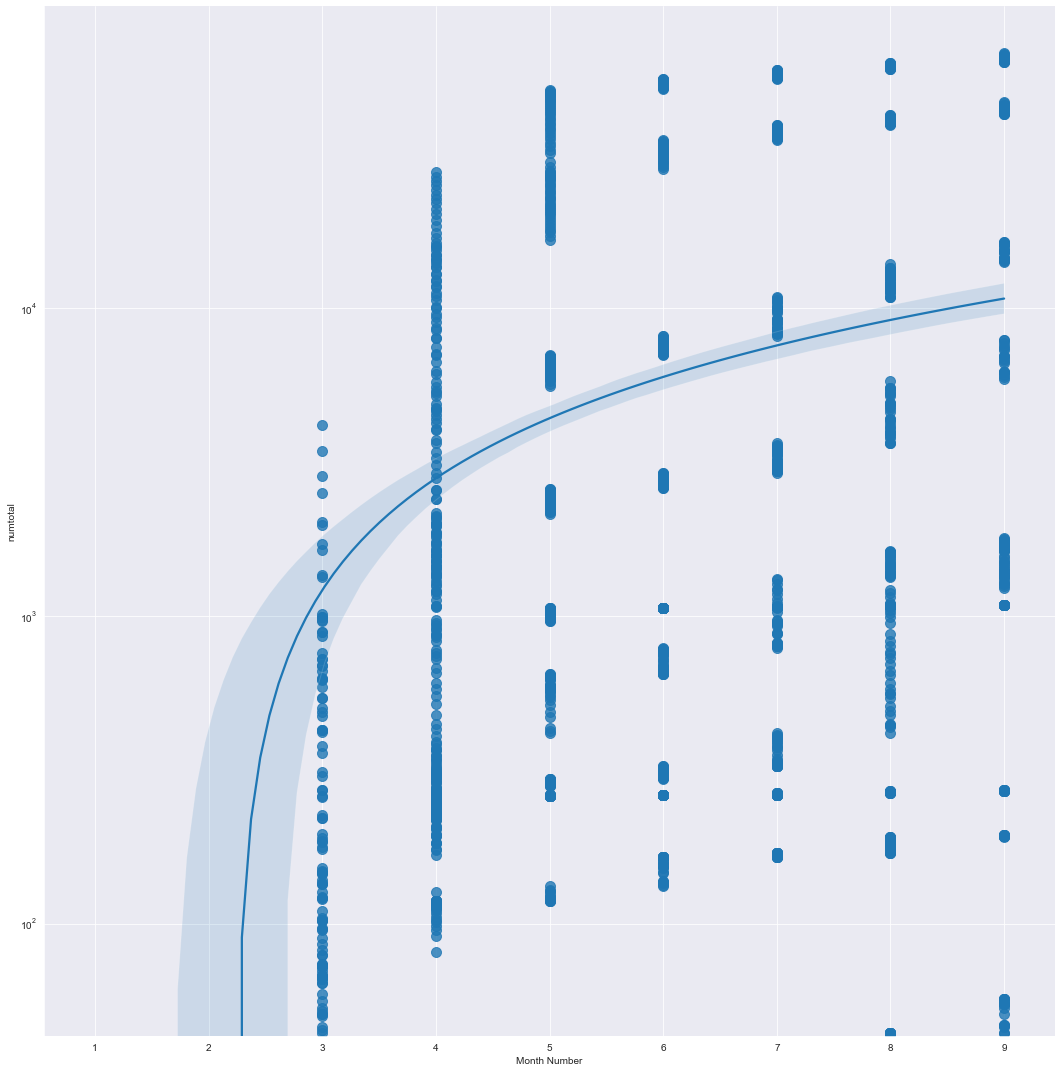

In [31]:
# Total Confirmed cases log scale

grid = sns.lmplot('Month Number', 'numtotal', canada_covid_df, height=15, truncate=True, scatter_kws={"s": 100})
grid.set(yscale="log")

 - why log scale graph?
 - Logarithmic graph can show the **trend of COVID-19 from much earlier** because of the way the scale has been compressed. This graph helps us to understand the <font color='green'>**trend of flatten the curve**</font>.
 - We can see that **closing of school** along with other measures have helped **CANADA** to curb the spread of virus, especially after <font color = 'red'> **May**</font>.
 - It also helped **CANADA** to flatten the <font color = 'red'>COVID-19 curve</font>.

#### One question still remains is that how effective the closing of the school is all alone?
1. For this we will analyze data based on age groups.

#### We will use data provided by Alberta Innovates
1. Lets load the data which is present in Data/covid19 folder and clean it.
- Data Source - <a href = "https://app.dataxch.ai/#/organizations/">For more info please click here</a>.

In [32]:
# Load data

canada_age_gender_df = pd.read_csv('../covid_data/Data/Covid-19/public-covid-19-cases-canada.csv.csv')
canada_age_gender_df.head(10)

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
0,NaN,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
1,NaN,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
2,NaN,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0015-0...
3,NaN,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/01/...
4,NaN,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,f,Close Contact,https://news.gov.bc.ca/releases/2020HLTH0023-0...
5,NaN,3,30-39,Male,Not Reported,BC,Canada,2020-02-06 00:00:00+00,2020-02-02 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...
6,NaN,4,30-39,Female,Not Reported,BC,Canada,2020-02-06 00:00:00+00,2020-02-02 00:00:00+00,t,NaN,https://news.gov.bc.ca/releases/2020HLTH0025-0...
7,NaN,5,30-39,Female,Interior,BC,Canada,2020-02-14 00:00:00+00,2020-02-09 00:00:00+00,t,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...
8,NaN,6,30-39,Female,Fraser,BC,Canada,2020-02-20 00:00:00+00,2020-02-16 00:00:00+00,t,NaN,(1) https://news.gov.bc.ca/releases/2020HLTH00...
9,NaN,4,20-29,Female,Toronto,Ontario,Canada,2020-02-23 00:00:00+00,2020-02-23 00:00:00+00,t,NaN,(1) https://news.ontario.ca/mohltc/en/2020/02/...


In [33]:
# Info of the data

canada_age_gender_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133347 entries, 0 to 133346
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   case_id             0 non-null       float64
 1   provincial_case_id  133347 non-null  int64  
 2   age                 133347 non-null  object 
 3   sex                 133347 non-null  object 
 4   health_region       133347 non-null  object 
 5   province            133347 non-null  object 
 6   country             133347 non-null  object 
 7   date_report         133347 non-null  object 
 8   report_week         133347 non-null  object 
 9   has_travel_history  1762 non-null    object 
 10  locally_acquired    1099 non-null    object 
 11  case_source         133347 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 12.2+ MB


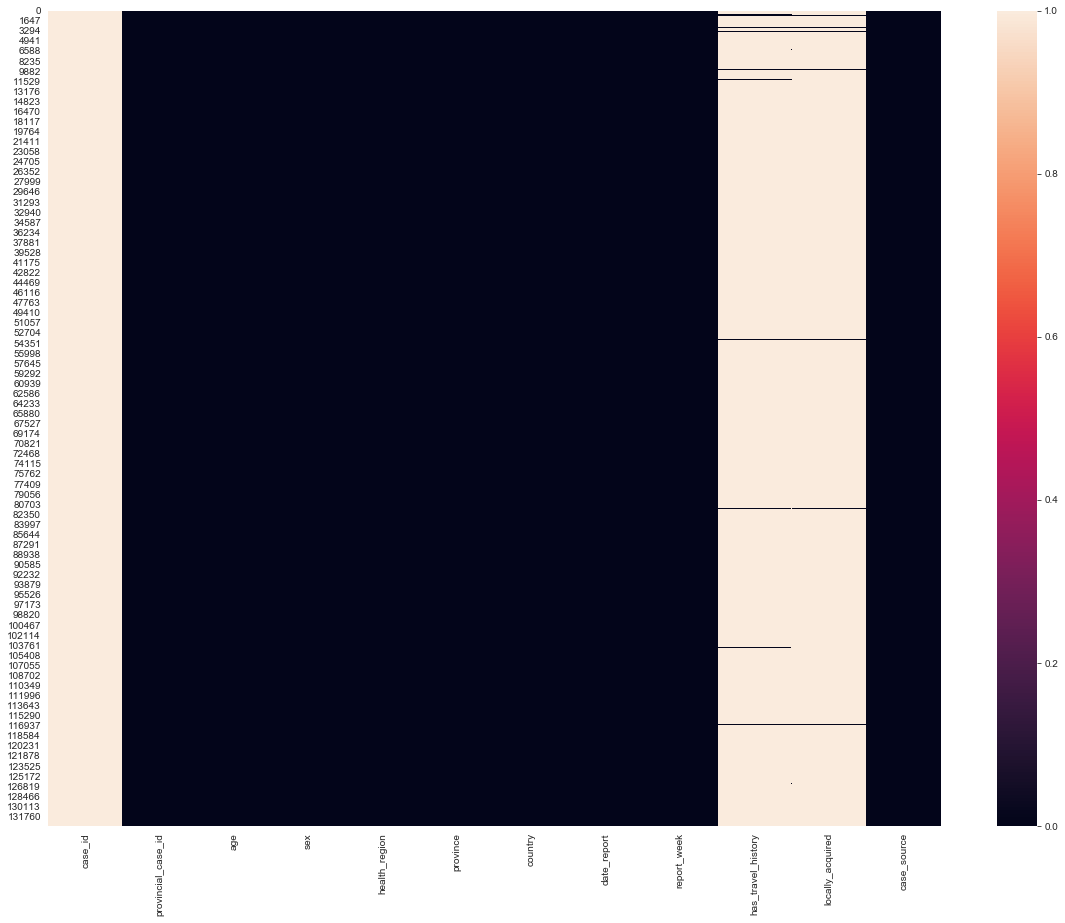

In [34]:
# Checking null variables in the dataset

plt.figure(figsize=(20,15))
sns.heatmap(canada_age_gender_df.isnull())

 - Columns case_id, has_travel_history, locally_acquired have null values.
1. case_id is of no use for us, as we are focusing on answering age based question.
2. has_travel_history might help us in differentiating the case from locally_acquired cases.

In [35]:
# Dropping case_id

canada_age_gender_df.drop('case_id',axis=1,inplace=True)

In [36]:
canada_age_gender_df['has_travel_history']

0           t
1           t
2           t
3           t
4           f
         ... 
133342    NaN
133343    NaN
133344    NaN
133345    NaN
133346    NaN
Name: has_travel_history, Length: 133347, dtype: object

In [37]:
# how many categorical variable in column has_travel_history

canada_age_gender_df['has_travel_history'].unique()

array(['t', 'f', nan], dtype=object)

In [38]:
# Making it numerical column as it will be easier to work with numerical data.

canada_age_gender_df['has_travel_history'] = (canada_age_gender_df['has_travel_history'].apply(lambda x : 1 if (x == 't')
                                                            else 0))

 - We changed the column based on following:
 1. All the 't' which meant that the patient had a travel history are converted to 1.
 2. All the 'f' which meant that the patient do not have a travel history are converted to 0.

In [39]:
# Categorical variables in locally_acquired column

canada_age_gender_df['locally_acquired'].unique()

array([nan, 'Close Contact', 'Community', 'Close contact',
       'close contact', '1'], dtype=object)

In [40]:
canada_age_gender_df[canada_age_gender_df['locally_acquired']=='1']

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
125229,42712,0-17,Female,Simcoe Muskoka,Ontario,Canada,2020-08-19 00:00:00+00,2020-08-16 00:00:00+00,0,1,https://www.simcoemuskokahealthstats.org/topic...


In [41]:
canada_age_gender_df[canada_age_gender_df['locally_acquired']=='Community']

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired,case_source
45,21,50-59,Female,Fraser,BC,Canada,2020-03-05 00:00:00+00,2020-03-01 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0062-0...
92,38,90-99,Male,Fraser,BC,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0072-0...
93,39,40-49,Male,Fraser,BC,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0072-0...
94,37,50-59,Male,Sudbury,Ontario,Canada,2020-03-10 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://www.phsd.ca/news/first-case-of-covid-1...
109,41,60-69,Female,Fraser,BC,Canada,2020-03-11 00:00:00+00,2020-03-08 00:00:00+00,0,Community,https://news.gov.bc.ca/releases/2020HLTH0074-0...
...,...,...,...,...,...,...,...,...,...,...,...
123039,42173,35-44,Male,Simcoe Muskoka,Ontario,Canada,2020-08-13 00:00:00+00,2020-08-09 00:00:00+00,0,Community,http://www.simcoemuskokahealthstats.org/topics...
125676,42852,50-59,Female,Sudbury,Ontario,Canada,2020-08-19 00:00:00+00,2020-08-16 00:00:00+00,0,Community,https://www.phsd.ca/health-topics-programs/dis...
126414,43073,40-49,Male,Sudbury,Ontario,Canada,2020-08-22 00:00:00+00,2020-08-16 00:00:00+00,0,Community,https://www.phsd.ca/news/public-service-announ...
127740,43379,35-44,Female,Simcoe Muskoka,Ontario,Canada,2020-08-25 00:00:00+00,2020-08-23 00:00:00+00,0,Community,https://www.simcoemuskokahealthstats.org/topic...


In [42]:
canada_age_gender_df['locally_acquired']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4         Close Contact
              ...      
133342              NaN
133343              NaN
133344              NaN
133345              NaN
133346              NaN
Name: locally_acquired, Length: 133347, dtype: object

In [43]:
# Converting the column to numerical values.

canada_age_gender_df['locally_acquired'] = canada_age_gender_df['locally_acquired'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [44]:
# We don't need case_source for this analysis, so we will drop that.

canada_age_gender_df.drop('case_source', inplace = True, axis = 1)

In [45]:
canada_age_gender_df

,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,has_travel_history,locally_acquired
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25 00:00:00+00,2020-01-19 00:00:00+00,1,0
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27 00:00:00+00,2020-01-26 00:00:00+00,1,0
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28 00:00:00+00,2020-01-26 00:00:00+00,1,0
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31 00:00:00+00,2020-01-26 00:00:00+00,1,0
4,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04 00:00:00+00,2020-02-02 00:00:00+00,0,1
...,...,...,...,...,...,...,...,...,...,...
133342,44851,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133343,44852,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133344,44853,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0
133345,44854,Not Reported,Not Reported,York,Ontario,Canada,2020-09-05 00:00:00+00,2020-08-30 00:00:00+00,0,0


In [46]:
# Age categories

canada_age_gender_df['age'].unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       'Not Reported', '10-19', '90-99', '<18', '<1', '2', '61', '50',
       '<10', '<20', '20-39', '60-79', '40-59', '100-109', '<19', '>90',
       '65-79', '18-34', '45-64', '35-44', '80+', '0-17', '90+', '45-65',
       '>80', '30-49', '0-9', '18-24', '0-19'], dtype=object)

In [47]:
# Dropping cases where age was not reported

canada_age_gender_df = canada_age_gender_df[canada_age_gender_df['age']!='Not Reported']

In [48]:
canada_age_gender_df['age'].unique()

array(['50-59', '40-49', '20-29', '30-39', '60-69', '80-89', '70-79',
       '10-19', '90-99', '<18', '<1', '2', '61', '50', '<10', '<20',
       '20-39', '60-79', '40-59', '100-109', '<19', '>90', '65-79',
       '18-34', '45-64', '35-44', '80+', '0-17', '90+', '45-65', '>80',
       '30-49', '0-9', '18-24', '0-19'], dtype=object)

In [49]:
# sex categories

canada_age_gender_df['sex'].unique()

array(['Male', 'Female', 'Not Reported'], dtype=object)

In [50]:
# Dropping sex category where sex was not reported

canada_age_gender_df = canada_age_gender_df[canada_age_gender_df['sex']!='Not Reported']

In [51]:
canada_age_gender_df['sex'].unique()

array(['Male', 'Female'], dtype=object)

In [52]:
canada_age_gender_df['date_report'] = pd.to_datetime(canada_age_gender_df['date_report'], infer_datetime_format=True)

In [53]:
canada_age_gender_df.drop('report_week',inplace=True,axis=1)

In [54]:
# Clean Dataset

canada_age_gender_df

,provincial_case_id,age,sex,health_region,province,country,date_report,has_travel_history,locally_acquired
0,1,50-59,Male,Toronto,Ontario,Canada,2020-01-25,1,0
1,2,50-59,Female,Toronto,Ontario,Canada,2020-01-27,1,0
2,1,40-49,Male,Not Reported,BC,Canada,2020-01-28,1,0
3,3,20-29,Female,Middlesex-London,Ontario,Canada,2020-01-31,1,0
4,2,50-59,Female,Vancouver Coastal,BC,Canada,2020-02-04,0,1
...,...,...,...,...,...,...,...,...,...
132683,47,10-19,Male,Prince Edward Island,PEI,Canada,2020-09-04,1,0
132872,44583,20-29,Male,Porcupine,Ontario,Canada,2020-09-04,1,0
132923,44634,18-34,Male,Simcoe Muskoka,Ontario,Canada,2020-09-04,0,0
132924,44635,18-34,Male,Simcoe Muskoka,Ontario,Canada,2020-09-04,0,0


In [55]:
# Reducing age column to only 2 categorical variable namely 'under20' and '20 and older'

under20 = ['0-17','0-19','0-9','10-19','18-24','18-34','<1','<10','<18','<19','<20']

def convert_agegroup(x):
    
    if x in under20:
        return 'under20'
    else:
        return '20 and older'

In [56]:
canada_age_gender_df['age'] = canada_age_gender_df['age'].apply(lambda x : convert_agegroup(x))

In [57]:
canada_age_gender_df.head(10)

,provincial_case_id,age,sex,health_region,province,country,date_report,has_travel_history,locally_acquired
0,1,20 and older,Male,Toronto,Ontario,Canada,2020-01-25,1,0
1,2,20 and older,Female,Toronto,Ontario,Canada,2020-01-27,1,0
2,1,20 and older,Male,Not Reported,BC,Canada,2020-01-28,1,0
3,3,20 and older,Female,Middlesex-London,Ontario,Canada,2020-01-31,1,0
4,2,20 and older,Female,Vancouver Coastal,BC,Canada,2020-02-04,0,1
5,3,20 and older,Male,Not Reported,BC,Canada,2020-02-06,1,0
6,4,20 and older,Female,Not Reported,BC,Canada,2020-02-06,1,0
7,5,20 and older,Female,Interior,BC,Canada,2020-02-14,1,0
8,6,20 and older,Female,Fraser,BC,Canada,2020-02-20,1,0
9,4,20 and older,Female,Toronto,Ontario,Canada,2020-02-23,1,0


In [58]:
# Getting Month number and month from the date report

canada_age_gender_df['Month'] = canada_age_gender_df['date_report'].dt.strftime('%b')
canada_age_gender_df['Month Number'] = canada_age_gender_df['date_report'].dt.month

In [59]:
# grouping by age and month to see the distribution.

month_age_df = canada_age_gender_df.groupby(['Month Number','age']).size().unstack(fill_value=0)
print(month_age_df)

age           20 and older  under20
Month Number                       
1                        4        0
2                       16        0
3                      820       21
4                      463       25
5                      209       18
6                      414       47
7                      640      118
8                     2130      304
9                      220       41


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

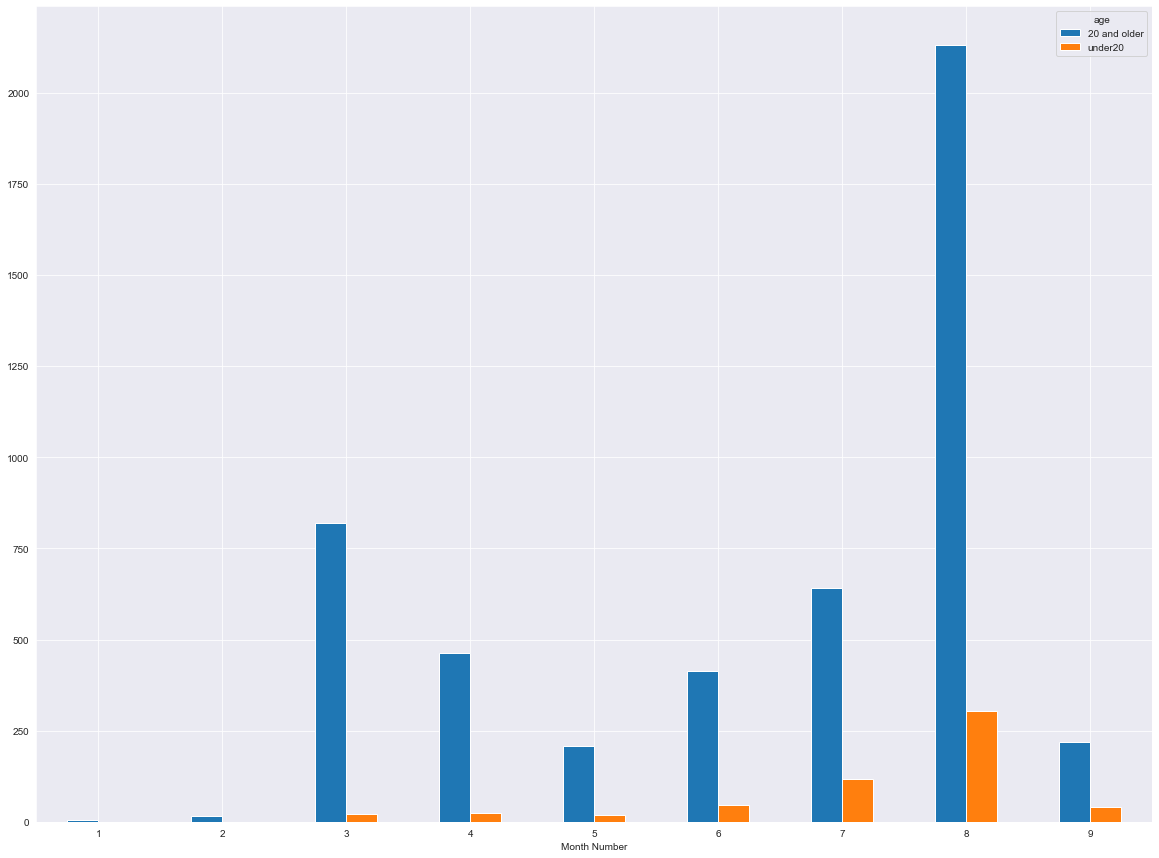

In [60]:
#plotting the data

month_age_df.plot.bar(figsize=(20,15))
plt.xticks(rotation = 0)

 - From this graph we can see that **school closure** has helped Canadian government contain the spread of virus.
 - Recent modelling studies of COVID-19 predict that school closures alone would prevent only <font color = 'red'>**2-4%**</font> of deaths only, which is much less than other social distancing interventions. <a href = 'https://www.thelancet.com/journals/lanchi/article/PIIS2352-4642(20)30095-X/fulltext#:~:text=Recent%20modelling%20studies%20of%20COVID,than%20other%20social%20distancing%20interventions.'>Source (School closure and management practices during coronavirus outbreaks including COVID-19: a rapid systematic review)</a>.

age            20 and older  under20
province                            
Alberta                  22        0
BC                     2865      369
Manitoba                355       67
NL                        9        1
New Brunswick            17        1
Nova Scotia               6        0
Ontario                1605      135
PEI                      34        1
Quebec                    2        0
Saskatchewan              1        0


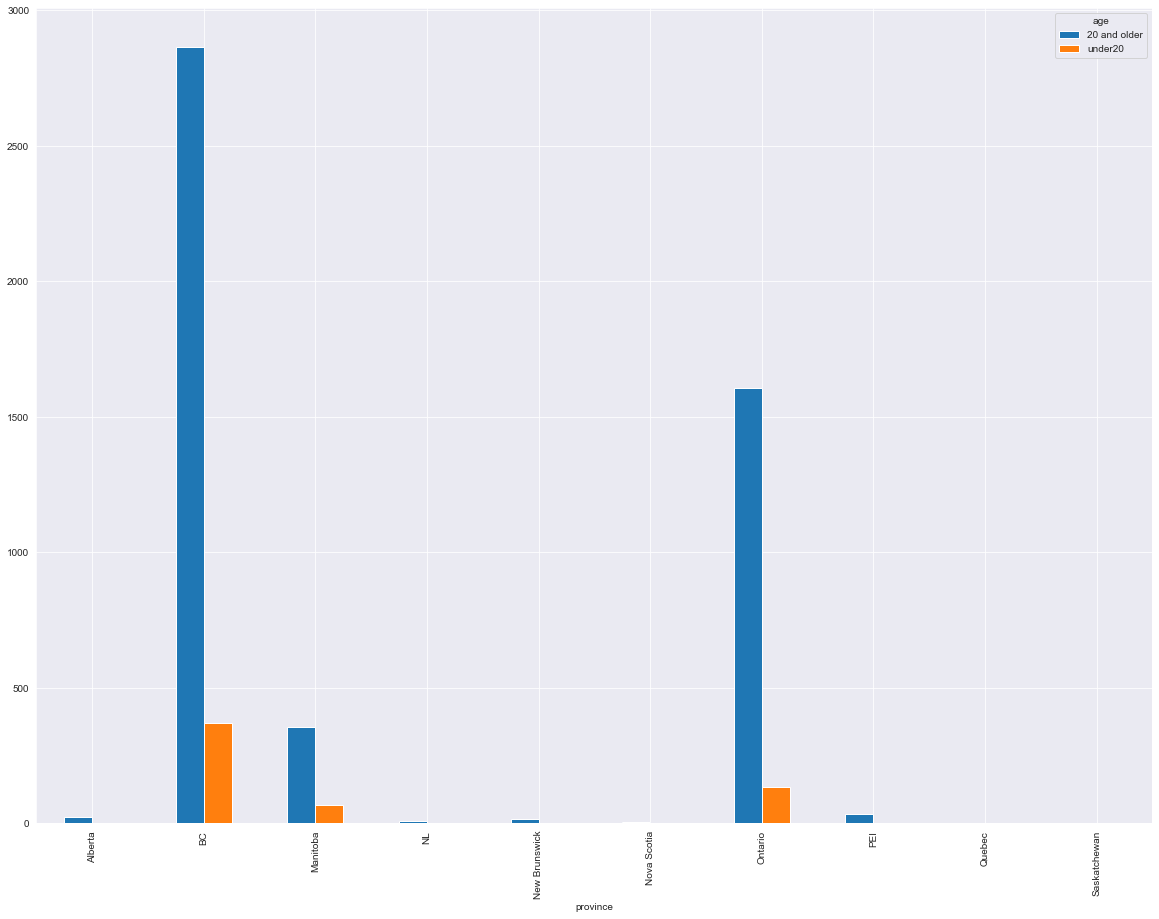

In [61]:
# provincial age distributed COVID-19 data

province_age_df = canada_age_gender_df.groupby(['province','age']).size().unstack(fill_value=0)
print(province_age_df)
province_age_df.plot.bar(figsize=(20,15))

 - We can also see how province wise this distribution is. Age group of <font color='green'>**Under20**</font> is less affected then age group of <font color='red'>**20 and above**</font>.
 - We can see this data doesn't give us much of information on provincial level, because there are many good sources for raw tally of cases, deaths and tests across the nation, there is no central repository in Canada for age-related COVID-19 data.
 - Some provinces offer easy access to data, while some release it in press only.
 - On Aug. 22, **Manitoba** suddenly stopped releasing age and public health region data for individual cases, making it impossible to easily calculate the recent share of youth cases.
 - **Nova Scotia**, meanwhile, has never provided detailed age-specific information.

age     20 and older  under20
sex                          
Female          2413      272
Male            2503      302


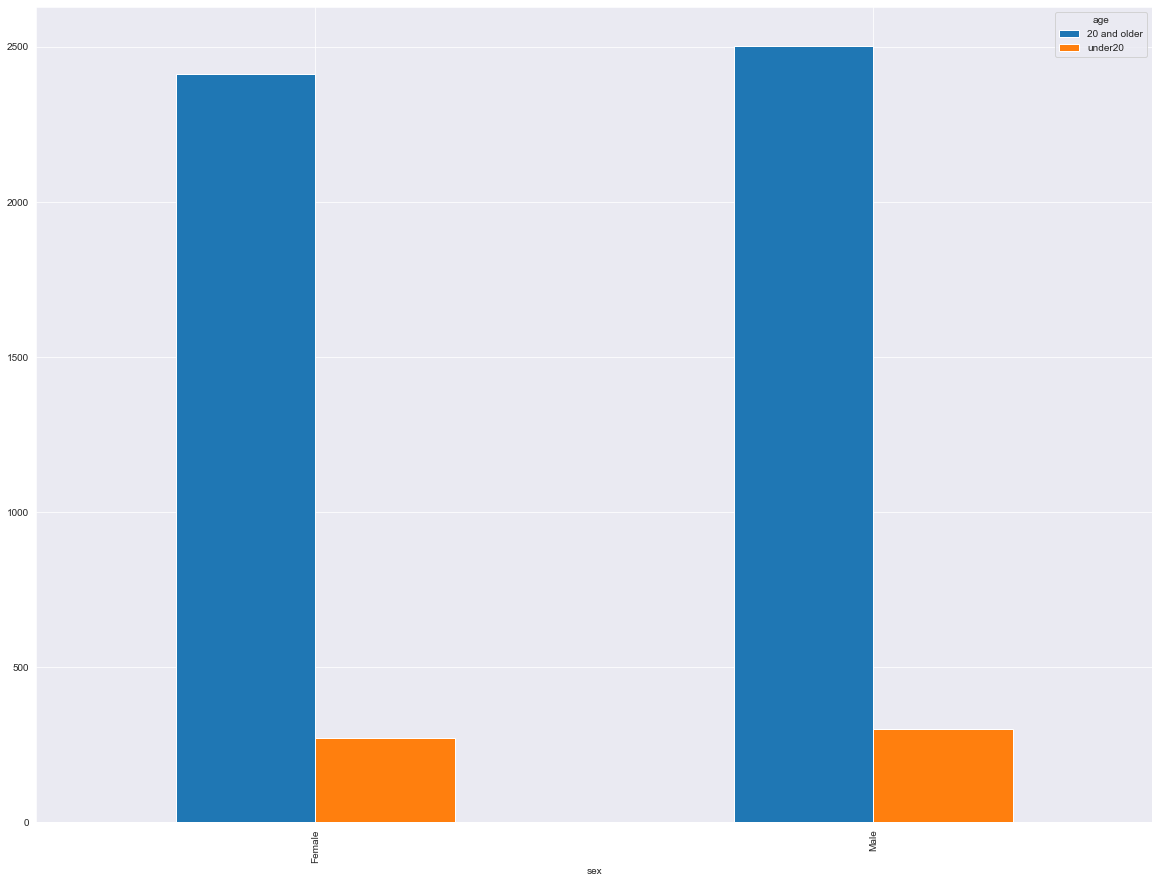

In [62]:
# grouping of the data by sex and age

sex_age_df = canada_age_gender_df.groupby(['sex','age']).size().unstack(fill_value=0)
print(sex_age_df)
sex_age_df.plot.bar(figsize=(20,15))

 - There is not much difference in the number of males and females getting sick by COVID-19. Its almost the same.

#### Now we will have a more deeper look in **COVID-19 Hospitalization and Death by Age**
1. <a href = "https://www.cdc.gov/coronavirus/2019-ncov/covid-data/investigations-discovery/hospitalization-death-by-age.html"> The data has been provided by Centers for Disease Control and Prevention</a>.
2. This will help us further analyze which age group is more affected by COVID-19.
3. This Analysis can be used to make policies which will help prevent the more affected age group in future pandemics.

In [66]:
# load Data

covid_by_age_df = pd.read_excel('../covid_data/Data/Covid-19/age_distribution.xlsx', header=[0,1])
covid_by_age_df

Unnamed: 0_level_0 Unnamed: 1_level_0 Total  (incl. age unknown)          \
                 Week        No. of Labs                Spec Tested   # Pos   
0              202010                 80                       8297     973   
1              202011                 86                      35674    3484   
2              202012                 87                      69707    6824   
3              202013                 89                      66523   10757   
4              202014                 89                      79548   14103   
5              202015                 88                      83211   15090   
6              202016                 87                      84676   15297   
7              202017                 86                     130726   21362   
8              202018                 87                     151196   19406   
9              202019                 87                     165675   17665   
10             202020                 89                     183690   15391   
11             202021                 88                     218820   14474   
12             202022                 88                     228052   12591   
13             202023                 88                     249787   11867   
14             202024                 89                     255468   12696   
15             202025                 88                     255212   13760   
16             202026                 89                     271934   17308   
17             202027                 90                     279122   17203   
18             202028                 90                     346571   26448   
19             202029                 90                     364816   28654   
20             202030                 90                     327391   27568   
21             202031                 90                     309075   24461   
22             202032                 89                     303096   21430   
23             202033                 88                     292381   19163   
24             202034                 90                     279778   16933   
25             202035                 88                     261249   16085   
26             202036                 88                     281940   15153   
27             202037                 86                     234583   10634   
28              Total                  .                    5818198  446780   

           0-4 years              5-17 years              18-49 years          \
   % Pos Spec Tested # Pos % Pos Spec Tested  # Pos % Pos Spec Tested   # Pos   
0   11.7         228    10   4.4         586     42   7.2        3179     318   
1    9.8         975    20   2.1        1966     83   4.2       15549    1371   
2    9.8        1576    36   2.3        2328     87   3.7       31820    2654   
3   16.2        1265    47   3.7        1433     80   5.6       29896    3812   
4   17.7        1128    64   5.7        1459    170  11.7       34902    4565   
5   18.1         915    43   4.7        1638    168  10.3       35079    4419   
6   18.1         798    66   8.3        1483    148  10.0       36425    5276   
7   16.3         914    55   6.0        2545    334  13.1       59368    8618   
8   12.8        1194   108   9.0        3952    478  12.1       66331    8053   
9   10.7        1731   104   6.0        4412    526  11.9       73029    7731   
10   8.4        1415   108   7.6        5156    516  10.0       79248    6993   
11   6.6        1829   125   6.8        6247    635  10.2       97119    6754   
12   5.5        1638   146   8.9        6307    637  10.1      101718    5910   
13   4.8        1953   163   8.3        7129    691   9.7      115691    6091   
14   5.0        2229   215   9.6        8500    904  10.6      121119    6772   
15   5.4        2353   214   9.1        9866   1036  10.5      121704    7646   
16   6.4        2879   274   9.5       12032   1346  11.2      136644   10101   
17   6.2      

In [67]:
covid_by_age_df.describe()

Total  (incl. age unknown)                               0-4 years  \
                     Spec Tested          # Pos      % Pos   Spec Tested   
count               2.900000e+01      29.000000  29.000000     29.000000   
mean                4.012550e+05   30812.413793   9.134483   4405.103448   
std                 1.046650e+06   80255.361791   4.295536  11501.122732   
min                 8.297000e+03     973.000000   4.500000    228.000000   
25%                 1.307260e+05   12696.000000   6.200000   1265.000000   
50%                 2.497870e+05   15391.000000   7.700000   2229.000000   
75%                 2.819400e+05   19406.000000  10.700000   3153.000000   
max                 5.818198e+06  446780.000000  18.100000  63874.000000   

                                  5-17 years                           \
             # Pos      % Pos    Spec Tested         # Pos      % Pos   
count    29.000000  29.000000      29.000000     29.000000  29.000000   
mean    384.000000   7.782759   17770.137931   1898.482759  10.034483   
std    1007.281206   2.538147   46595.602819   4988.563296   2.433879   
min      10.000000   2.100000     586.000000     42.000000   3.700000   
25%      66.000000   6.000000    2545.000000    334.000000   9.800000   
50%     163.000000   8.700000    8500.000000    904.000000  10.500000   
75%     299.000000   9.400000   15582.000000   1493.000000  11.600000   
max    5568.000000  11.700000  257667.000000  27528.000000  13.400000   

        18-49 years                             50-64 years                \
        Spec Tested          # Pos      % Pos   Spec Tested         # Pos   
count  2.900000e+01      29.000000  29.000000  2.900000e+01     29.000000   
mean   2.008657e+05   15529.379310   8.627586  8.583621e+04   5974.965517   
std    5.245030e+05   40523.309601   2.803938  2.237746e+05  15555.449124   
min    3.179000e+03     318.000000   4.800000  1.973000e+03    247.000000   
25%    5.936800e+04    5910.000000   6.600000  2.935800e+04   2395.000000   
50%    1.211190e+05    7731.000000   8.300000  5.394500e+04   2999.000000   
75%    1.551700e+05   10156.000000  10.000000  5.904600e+04   3944.000000   
max    2.912553e+06  225176.000000  14.500000  1.244625e+06  86637.000000   

                     65+ years                            
           % Pos   Spec Tested          # Pos      % Pos  
count  29.000000  2.900000e+01      29.000000  29.000000  
mean    8.675862  9.143069e+04    6930.068966   9.755172  
std     4.967081  2.382398e+05   18079.156185   7.213112  
min     3.700000  2.153000e+03     331.000000   3.700000  
25%     5.100000  3.778500e+04    2471.000000   4.700000  
50%     6.800000  5.328200e+04    3494.000000   5.900000  
75%    11.800000  6.435400e+04    4710.000000  12.800000  
max    19.300000  1.325745e+06  100486.000000  26.800000

In [68]:
covid_by_age_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   (Unnamed: 0_level_0, Week)                 29 non-null     object 
 1   (Unnamed: 1_level_0, No. of Labs)          29 non-null     object 
 2   (Total  (incl. age unknown), Spec Tested)  29 non-null     int64  
 3   (Total  (incl. age unknown), # Pos)        29 non-null     int64  
 4   (Total  (incl. age unknown), % Pos)        29 non-null     float64
 5   (0-4 years, Spec Tested)                   29 non-null     int64  
 6   (0-4 years, # Pos)                         29 non-null     int64  
 7   (0-4 years, % Pos)                         29 non-null     float64
 8   (5-17 years, Spec Tested)                  29 non-null     int64  
 9   (5-17 years, # Pos)                        29 non-null     int64  
 10  (5-17 years, % Pos)         

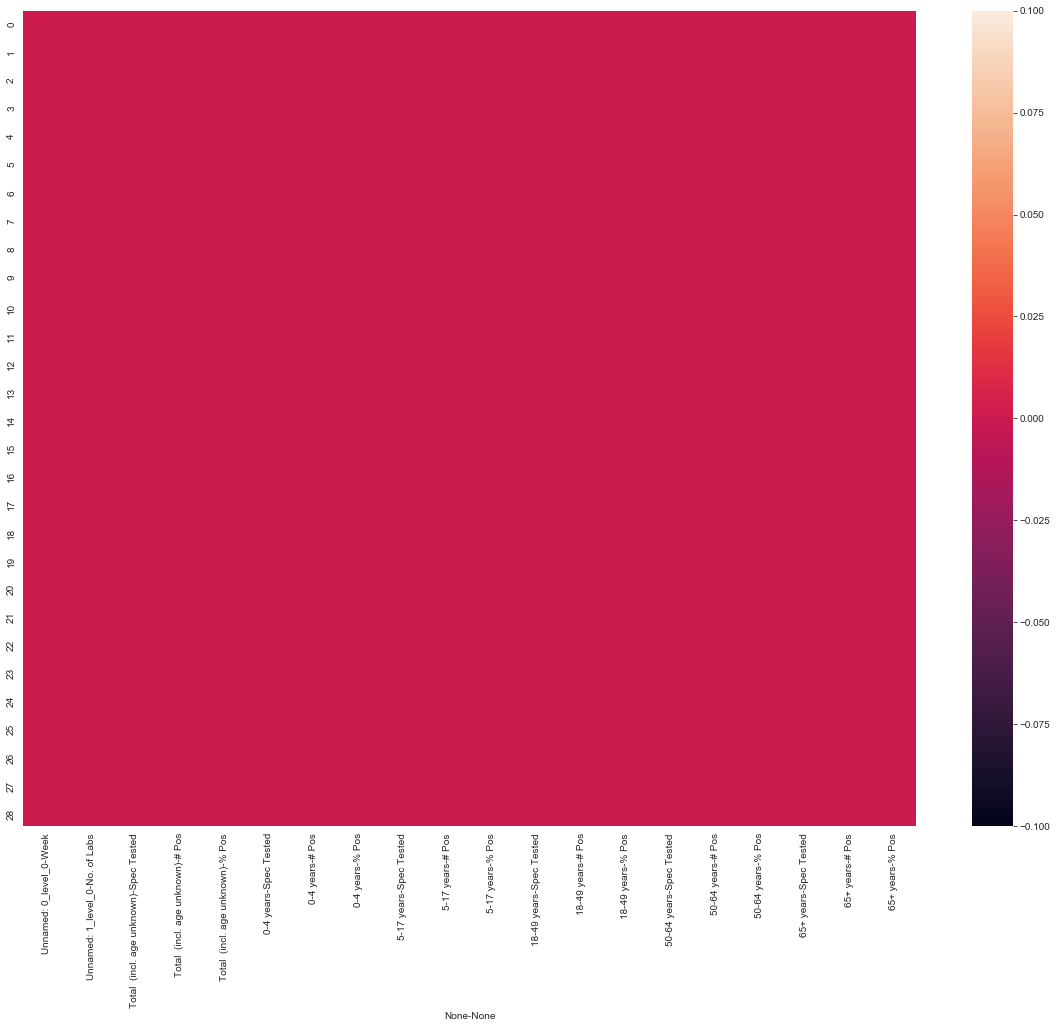

In [69]:
# Checking Null values

plt.figure(figsize=(20,15))
sns.heatmap(covid_by_age_df.isnull())

 - As we can see this dataset has been curated very well we don't have any null objects.

In [70]:
# Dropping column which are not useful.

age_distribution_df = covid_by_age_df.drop('Total  (incl. age unknown)', axis = 1)
age_distribution_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


Unnamed: 0_level_0 Unnamed: 1_level_0   0-4 years              5-17 years  \
                 Week        No. of Labs Spec Tested # Pos % Pos Spec Tested   
0              202010                 80         228    10   4.4         586   
1              202011                 86         975    20   2.1        1966   
2              202012                 87        1576    36   2.3        2328   
3              202013                 89        1265    47   3.7        1433   
4              202014                 89        1128    64   5.7        1459   
5              202015                 88         915    43   4.7        1638   
6              202016                 87         798    66   8.3        1483   
7              202017                 86         914    55   6.0        2545   
8              202018                 87        1194   108   9.0        3952   
9              202019                 87        1731   104   6.0        4412   
10             202020                 89        1415   108   7.6        5156   
11             202021                 88        1829   125   6.8        6247   
12             202022                 88        1638   146   8.9        6307   
13             202023                 88        1953   163   8.3        7129   
14             202024                 89        2229   215   9.6        8500   
15             202025                 88        2353   214   9.1        9866   
16             202026                 89        2879   274   9.5       12032   
17             202027                 90        3153   299   9.5       12946   
18             202028                 90        4427   399   9.0       17640   
19             202029                 90        4849   454   9.4       21391   
20             202030                 90        4368   513  11.7       19431   
21             202031                 90        3735   410  11.0       17101   
22             202032                 89        3532   407  11.5       15970   
23             202033                 88        3344   326   9.7       15582   
24             202034                 90        3022   284   9.4       14235   
25             202035                 88        3002   270   9.0       15233   
26             202036                 88        3076   259   8.4       17001   
27             202037                 86        2346   149   6.4       14098   
28              Total                  .       63874  5568   8.7      257667   

                18-49 years               50-64 years               \
    # Pos % Pos Spec Tested   # Pos % Pos Spec Tested  # Pos % Pos   
0      42   7.2        3179     318  10.0        1973    247  12.5   
1      83   4.2       15549    1371   8.8        8379    986  11.8   
2      87   3.7       31820    2654   8.3       16115   1816  11.3   
3      80   5.6       29896    3812  12.8       15579   2917  18.7   
4     170  11.7       34902    4565  13.1       18865   3642  19.3   
5     168  10.3       35079    4419  12.6       20004   3638  18.2   
6     148  10.0       36425    5276  14.5       19294   3351  17.4   
7     334  13.1       59368    8618  14.5       29358   4722  16.1   
8     478  12.1       66331    8053  12.1       34592   4123  11.9   
9     526  11.9       73029    7731  10.6       38644   3598   9.3   
10    516  10.0       79248    6993   8.8       41972   2999   7.1   
11    635  10.2       97119    6754   7.0       48621   2778   5.7   
12    637  10.1      101718    5910   5.8       50807   2395   4.7   
13    691   9.7      115691    6091   5.3       55274   2136   3.9   
14    904  10.6      121119    6772   5.6       54489   2225   4.1   
15   1036  10.5      121704    7646   6.3       53945   2367   4.4   
16   1346  11.2      136644   10101   7.4       57332   2798   4.9   
17   1301  10.0      143309   10156   7.1       57137   2991   5.2   
18   1932  11.0      180239   15354   8.5       71464   4731   6.6   
19   2485  11.6      192798   16748   8.7       7490

Text(0, 0.5, 'Spec Tested')

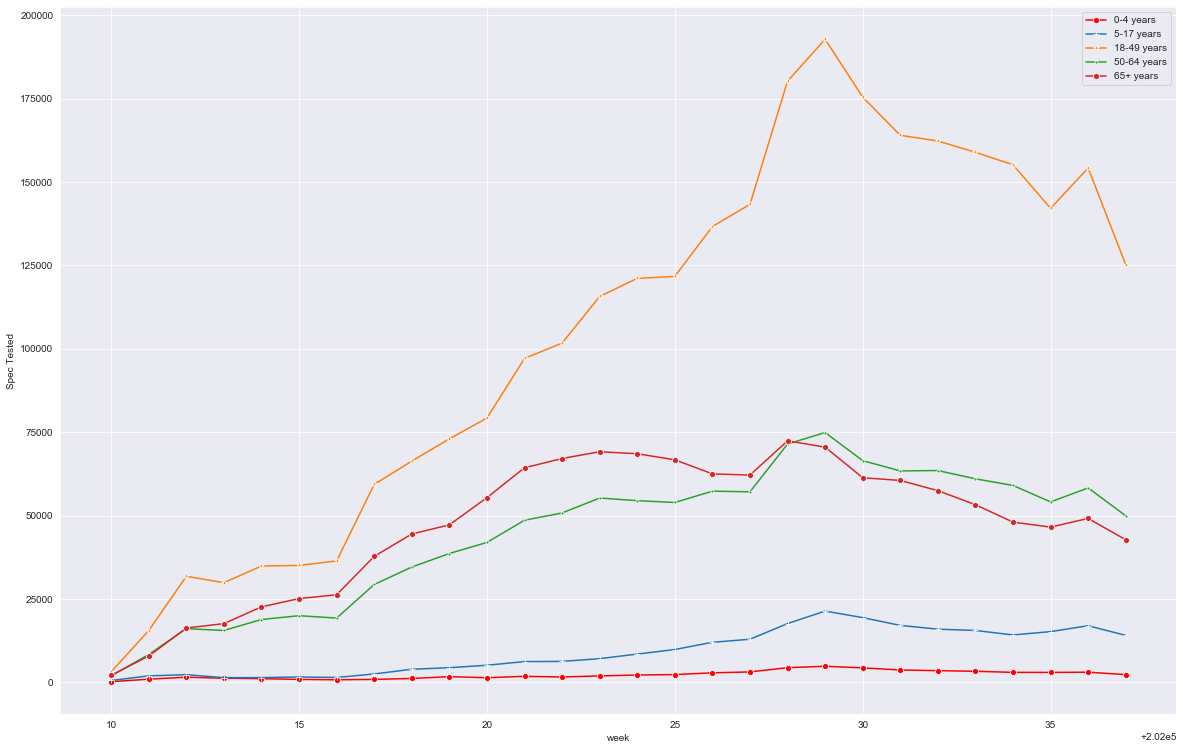

In [71]:
# Plot of person Tested versus number of week

plt.figure(figsize=(20,13))

 
sns.lineplot(y = age_distribution_df.iloc[0:28]['0-4 years', 'Spec Tested'], 
                 x = age_distribution_df.iloc[0:28]['Unnamed: 0_level_0','Week'], 
                 data= age_distribution_df, color = 'red', marker = 'o', legend='brief')

sns.lineplot(y = age_distribution_df.iloc[0:28]['5-17 years', 'Spec Tested'], 
                 x = age_distribution_df.iloc[0:28]['Unnamed: 0_level_0','Week'], 
                 data= age_distribution_df, marker = '+', legend='brief')

sns.lineplot(y = age_distribution_df.iloc[0:28]['18-49 years', 'Spec Tested'], 
                 x = age_distribution_df.iloc[0:28]['Unnamed: 0_level_0','Week'], 
                 data= age_distribution_df, marker = '*', legend='brief')

sns.lineplot(y = age_distribution_df.iloc[0:28]['50-64 years', 'Spec Tested'], 
                 x = age_distribution_df.iloc[0:28]['Unnamed: 0_level_0','Week'], 
                 data= age_distribution_df, marker = '.', legend='brief')

sns.lineplot(y = age_distribution_df.iloc[0:28]['65+ years', 'Spec Tested'], 
                 x = age_distribution_df.iloc[0:28]['Unnamed: 0_level_0','Week'], 
                 data= age_distribution_df, marker = 'o', legend='brief')

plt.legend(['0-4 years', '5-17 years', '18-49 years','50-64 years','65+ years'])
plt.xlabel('week')
plt.ylabel('Spec Tested')

 - From this graph we can see that maximum number of persons which got tested for **COVID-19** are from age group <font color = 'red'>**18-49**</font>.
 - This age group primarily includes students, and working class. Both of these class were at <font color = 'red'>**high risk**</font> because they were out and exposed to virus more than other age groups.
 - After **30th week** we can see a drop in the number of people tested for COVID-19, which we can relate to **closure of the school**.
 - Age group <font color = 'green'>**<17**</font> has not been affected much, as less number of persons got tested from this age group.
 - Age group 50-64 and 65+ got almost same number of persons tested, but this age group has been most affected by COVID-19. As the virus causes respiratory illnes which can lead to hospitalization and even death for <font color = 'red'>young and middle-aged adults</font>.
 - COVID-19 has caused most severe health issues for adults over the age of 60. This is due in no small part to the number of underlying health conditions. Diseases like diabetes, heart disease, and other chronic illness can lead to more intense symptoms and complications in the disease. Additionally as people age, their immune system gradually looses it resiliency.

In [72]:
#Multilevel indexing sometime makes it hard to work with, here is the easy way out.

year0_4 = age_distribution_df.iloc[0:28]['0-4 years','% Pos']
year5_17 = age_distribution_df.iloc[0:28]['5-17 years', '% Pos']
year18_49 = age_distribution_df.iloc[0:28]['18-49 years', '% Pos']
year50_64 = age_distribution_df.iloc[0:28]['50-64 years','% Pos']
year65plus = age_distribution_df.iloc[0:28]['65+ years', '% Pos']

Text(0, 0.5, '% Positive')

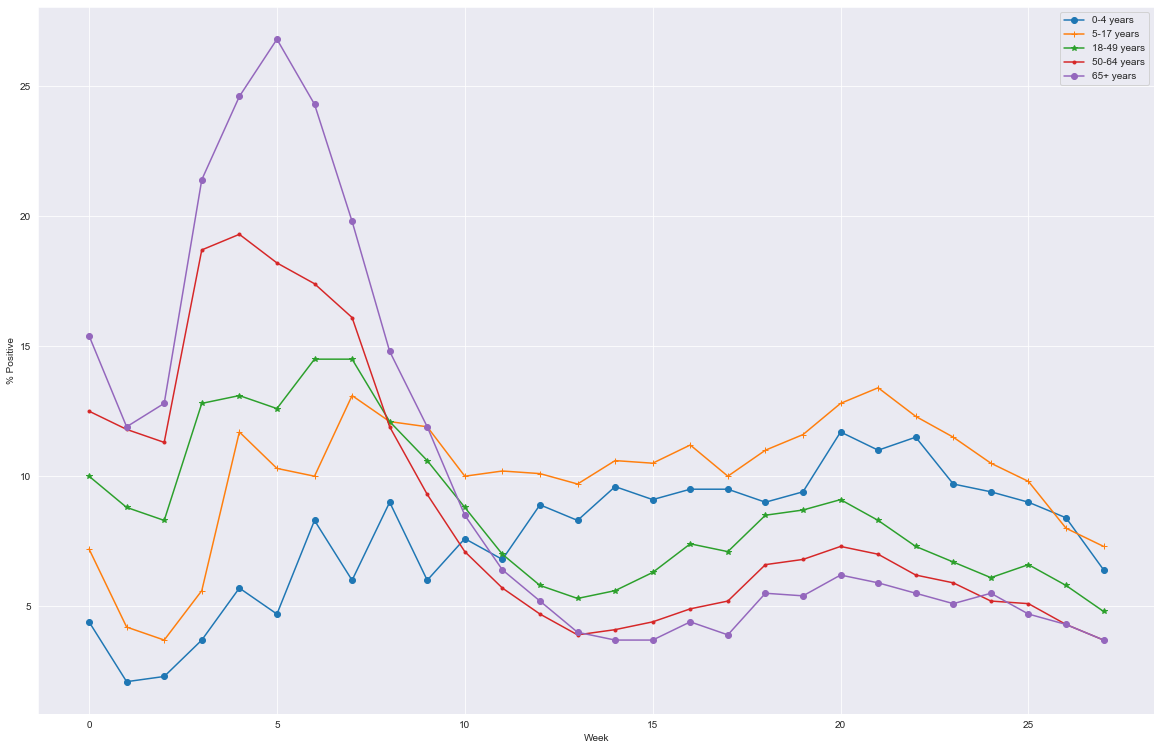

In [73]:
# % positive versus week

plt.figure(figsize=(20,13))

year0_4.plot(kind='line',marker='o')
year5_17.plot(kind='line',marker='+')
year18_49.plot(kind='line',marker='*')
year50_64.plot(kind='line',marker='.')
year65plus.plot(kind='line',marker='o')

plt.legend(['0-4 years', '5-17 years', '18-49 years','50-64 years','65+ years'])
plt.xlabel('Week')
plt.ylabel('% Positive')

 - Here we can see that even though more number of the persons got tested from age group 18-49, yet the percentage of having corona (% positive) remains in the bottom 3. This can be attributed to **closure of school** and better immunity than the rest of the age group.
 - On the other hand age group 50+ has less number of persons tested, but highest % positive cases as comapred to other 3 age groups. This can be attributed to low immunity as age increases.
 - Age group < 17 has lowest number of % positive which also can be attributed to **closure of school** and better immunity.

#### Rate ratios compared to 18-29 year olds
1. Data source: COVID-NET (https://www.cdc.gov/coronavirus/2019-ncov/covid-data/covidview/index.html, accessed 08/06/20). Numbers are unadjusted rate ratios.
2. Data source: NCHS Provisional Death Counts (https://www.cdc.gov/nchs/nvss/vsrr/COVID19/index.htm, accessed 08/06/20). Numbers are unadjusted rate ratios.

In [74]:
# load data for ratio comparison

rate_ratio_df = pd.read_excel('../covid_data/Data/Covid-19/rate_ratio.xlsx')
rate_ratio_df

,Age Group,Hospitalization,Death
0,0-4 years,4x lower,9x lower
1,5-17 years,9x lower,16x lower
2,18-29 years,Comparison Group,Comparison Group
3,30-39 years,2x higher,4x higher
4,40-49 years,3x higher,10x higher
5,50-64 years,4x higher,30x higher
6,65-74 years,5x higher,90x higher
7,75-84 years,8x higher,220x higher
8,85+ years,13x higher,630x higher


In [75]:
# Ratio comparison based on hospitalization and Death

def highlight_rows(x):
    df = x.copy()
    df.loc[5:,] = 'background-color: red'
    df.loc[:2] = 'background-color:green'
    df.loc[2] = 'background-color:yellow'
    df.loc[3:4] = 'background-color: orange'
    return df

rate_ratio_df.style.apply(highlight_rows,axis=None)

,Age Group,Hospitalization,Death
0,0-4 years,4x lower,9x lower
1,5-17 years,9x lower,16x lower
2,18-29 years,Comparison Group,Comparison Group
3,30-39 years,2x higher,4x higher
4,40-49 years,3x higher,10x higher
5,50-64 years,4x higher,30x higher
6,65-74 years,5x higher,90x higher
7,75-84 years,8x higher,220x higher
8,85+ years,13x higher,630x higher


 - From this table we can see that if we compare hospitalization then, <font color ='red'>**13x**</font> more number of persons were **hospitalized from age groups > 50**.
 - This data also suggest that **age group < 17** are <font color = 'green'>**5x**</font> on the lower side of the risk.
 - From this we can conclude that **school closure** was an effective policy if we combine it with other policy which focuses on higher age group. As they were the ones who are more susceptible to COVID-19.
 - **Closure of schools** from the month of **March** can also be attributed to declining number of COVID-19 cases.
 - Alberta is closely monitoring it schools as they have reopened them from the month of **September**.
 - Public health measures are in place to ensure a safer reopening of schools. This includes mandatory masking, physical distancing, enhanced cleaning, daily symptom screening. If a case is confirmed, contact tracers and public health officials will be deployed to identify potential exposure and limit spread.

#### COVID-19 School Status Map (Alberta)
1. Data Source (https://www.alberta.ca/schools/covid-19-school-status-map.htm) 

In [76]:
# load Alberta specific data

school_status_map = pd.read_csv('../covid_data/Data/AlbertaSchoolClosure/covid19dataexport-schools.csv')
school_status_map

,Unnamed: 0,Region name,School status,Schools details
0,1,City Of Calgary,Watch,St. Wilfrid Elementary School
1,2,City Of Calgary,"Open (Outbreak, 2-4 cases)",Notre Dame High School
2,3,City Of Calgary,"Open (Outbreak, 2-4 cases)",Lester B. Pearson High School
3,4,City Of Calgary,"Open (Outbreak, 2-4 cases)",Henry Wise Wood High School
4,5,City Of Calgary,"Open (Outbreak, 2-4 cases)",Auburn Bay School
...,...,...,...,...
115,116,Vulcan County,Open,No school status to report
116,117,Westlock County,Open,No school status to report
117,118,Wheatland County,Open,No school status to report
118,119,Woodlands County,Open,No school status to report


#### Region Classification (Alberta)
1. **Enhanced** - Risk levels require enhanced measures to control the spread at a school or school authority level. School(s) may be moved to scenario 2 (in school classes partially operating) or scenario 3 (at-home learning).
2. **Watch** - School outbreak declared with 5 or more cases where disease could have been acquired or transmitted in the school. Scenario 1 – school is open with near normal operations with some public health measures. Province is monitoring risk and working with the school, school authority and Alberta Health Services. Additional public health measures may be in place within a school to control the spread
3. **Open** - No schools in this area have outbreaks of 5 or more cases. Scenario 1 – school is open with near normal operations with some public health measures. Parents may have received an alert from their school. Alberta Health Services may be working with local schools, but any additional measures are localized and targeted.

In [77]:
school_status_map[school_status_map['School status']=='Watch']

,Unnamed: 0,Region name,School status,Schools details
0,1,City Of Calgary,Watch,St. Wilfrid Elementary School


 - Only one school in Alberta is on <font color = 'blue'>**Watch**</font> which shows how effective the school closure was. As stating at home of students has helped contain the spread of virus.
 - Rest of the schools are fully open and functional complying with **Public health measures for safer reopening of the school**.

 - So **School Closure** which targets **5.5 million** students who are enrolled in elementary and secondary school programs. We can say that this policy is effective to contain the spread in 14% of the total population(37.6 million) in canada.
 - Recent modelling from past pandemics also states that school closure only would prevent ~2-4% deaths. But its very effective for the school going age group.

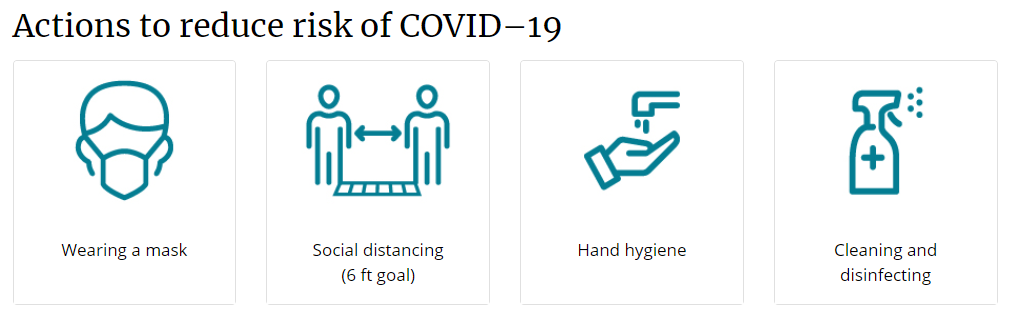

In [82]:
Image('../Images/actiontoreduceCOVID-19.PNG')